# 작사가 언어 모델 만들기
# 1) 데이터 다운, 불러오기

In [30]:
from IPython.display import Image
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import glob
import os
import re
import tensorflow as tf

txt_file_path = os.getenv('HOME')+'/aiffel/enode4/lyricist/data/lyrics/*'

txt_list = glob.glob(txt_file_path)

raw_corpus = []

for txt_file in txt_list:
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)

print("데이터 크기:", len(raw_corpus))
print("Examples:\n", raw_corpus[:3])

데이터 크기: 187088
Examples:
 ['If you ever get close to a human and human behavior', 'Be ready, be ready to get confused and me and my here after', "There's definitely, definitely, definitely no logic to human behavior"]


# 2) 데이터 정제, 전처리

### 2-1) 1차 데이터 전처리 함수 - `preprocess_sentence(sentence)`

- 대문자를 소문자로 치환
- 문장 부호 양 옆에는 공백 삽입
- 여러 개의 공백은 한 개의 공백으로 치환
- 영어와 문장부호를 제외한 특수문자는 공백

In [3]:
def preprocess_sentence(sentence):
    sentence = sentence.lower() # 대문자 -> 소문자로 치환
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence) # 문장 부호 사이에 공백
    sentence = re.sub(r'[" "]+', " ", sentence) # 여러개 공백은 하나로
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) # 정해진 부호 아닌 특수 문자는 공백
    sentence = sentence.strip() # 양쪽 공백 제거
    sentence = '<start> ' + sentence + ' <end>' # 6
    return sentence

### 2-2) 문장 최대 길이 제한
- 다른 문장에 비해 너무 긴 문장 한 두 개로 인해 길이를 맞춰 주기 위한 패딩이 많이 들어가게 된다.
- 이를 방지하기 위해 한 문장에서 단어의 개수가 15개 이상인 경우를 제외하고 말뭉치에 담자.

In [4]:
corpus = []
for sentence in raw_corpus:
    # 문장 길이가 0이면 넘어가기
    if len(sentence) == 0: continue
    # 문장의 끝이 :면 넘어가기
    if sentence[-1] == ':': continue
    
    # 전처리
    preprocessed_sentence = preprocess_sentence(sentence)
    
    # 전처리 후 문장 단어 개수가 15개 이상이면 말뭉치에 담지 않기
    if preprocessed_sentence.count(' ') > 14: continue
    # 전처리 후 공백만 남아있으면 말뭉치에 담지 않기
    if preprocessed_sentence==' ': continue
        
    corpus.append(preprocessed_sentence)
corpus[:10]

['<start> if you ever get close to a human and human behavior <end>',
 '<start> there s definitely , definitely , definitely no logic to human behavior <end>',
 '<start> but yet so , yet so irresistible and me and my fear can <end>',
 '<start> but oh , to get involved in the exchange of human emotions <end>',
 '<start> is ever so , ever so satisfying and they and my here on <end>',
 '<start> and there is no map and chair too human behavior , human behavior <end>',
 '<start> human behavior , human behavior and there is no map <end>',
 '<start> and a compass wouldn t help at all <end>',
 '<start> yeah , uncertain human behavior , human behavior <end>',
 '<start> human behavior , human behavior <end>']

### 2-3) 음악 용어 제거하기

In [5]:
for i in corpus:
    if i.count(' ')==2:
        print(i)

<start> suggests <end>
<start> touches <end>
<start> arousal <end>
<start> suggests <end>
<start> touches <end>
<start> arousal <end>
<start> emergency <end>
<start> sometimes <end>
<start> babe <end>
<start> crooked <end>
<start> kahiiiiiii <end>
<start> kahi <end>
<start> kahiiiiiii <end>
<start> kahi <end>
<start> rapture <end>
<start> oh <end>
<start> scolanscolan <end>
<start> scolanscolan <end>
<start> scolanscolan <end>
<start> scolanscolan <end>
<start> scanscanscan <end>
<start> sksksksksksk <end>
<start> skskskskksksks <end>
<start> brrbrbrbbbrbrehheee <end>
<start> over <end>
<start> ohrwaaa <end>
<start> unsenononah <end>
<start> aheeeeee <end>
<start> eeeeeeeeeeeeeeeeeeee <end>
<start> howwwooooooooeeeeeee <end>
<start> geeeeeeeheeheeeeeeee <end>
<start> howwwwwwweeeeeeeeeee <end>
<start> eeeeeeeeeeeeeeeeeeee <end>
<start> heeeeheeeeeeeeeeeeee <end>
<start> owwooooeeeeioioeeeee <end>
<start> fanta <end>
<start> air <end>
<start> ohtuuuuekeah <end>
<start> handeeeeeeey <end

<start> thunder <end>
<start> thunder <end>
<start> thunder <end>
<start> thunder <end>
<start> thunder <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> cream <end>
<start> boogie <end>
<start> willin <end>
<start> able <end>
<start> willin <end>
<start> able <end>
<start> yeah <end>
<start> alright <end>
<start> jughead <end>
<start> push <end>
<start> push <end>
<start> push <end>
<start> push <end>
<start> push <end>
<start> push <end>
<start> push <end>
<start> push <end>
<start> push <end>
<start> well <end>
<start> hey <end>
<start> shucks <end>
<start> ok <end>
<start> continental <end>
<start> continental <end>
<start> yeah <end>
<start> god <end>
<start> u <

- 말뭉치 `<start>`, `<end>`를 제외하고 한 단어만 들어간 문장을 다시 한 번 보았다.
- `<start> <end>`와 같이 공백만 들어간 문장도 보였고 
- `chorus`나 `verse`, `intro`, `hook`, `bridge` 같이 실제 가사 문장에 사용되지 않는 단어들이 보여 추가적으로 제거하기로 했다

In [6]:
music_term = ['chorus','verse','intro','hook','bridge','outro']
for idx, sentence in enumerate(corpus):
#     if sentence == '<start>  <end>':
#         del corpus[idx]
    if any(x in sentence for x in music_term):
        del corpus[idx]

In [7]:
for i in corpus:
    if i.count(' ')==2:
        print(i)

<start> suggests <end>
<start> touches <end>
<start> arousal <end>
<start> suggests <end>
<start> touches <end>
<start> arousal <end>
<start> emergency <end>
<start> sometimes <end>
<start> babe <end>
<start> crooked <end>
<start> kahiiiiiii <end>
<start> kahi <end>
<start> kahiiiiiii <end>
<start> kahi <end>
<start> rapture <end>
<start> oh <end>
<start> scolanscolan <end>
<start> scolanscolan <end>
<start> scolanscolan <end>
<start> scolanscolan <end>
<start> scanscanscan <end>
<start> sksksksksksk <end>
<start> skskskskksksks <end>
<start> brrbrbrbbbrbrehheee <end>
<start> over <end>
<start> ohrwaaa <end>
<start> unsenononah <end>
<start> aheeeeee <end>
<start> eeeeeeeeeeeeeeeeeeee <end>
<start> howwwooooooooeeeeeee <end>
<start> geeeeeeeheeheeeeeeee <end>
<start> howwwwwwweeeeeeeeeee <end>
<start> eeeeeeeeeeeeeeeeeeee <end>
<start> heeeeheeeeeeeeeeeeee <end>
<start> owwooooeeeeioioeeeee <end>
<start> fanta <end>
<start> air <end>
<start> ohtuuuuekeah <end>
<start> handeeeeeeey <end

<start> saved <end>
<start> saved <end>
<start> saved <end>
<start> saved <end>
<start> saved <end>
<start> saved <end>
<start> preach <end>
<start> thinking <end>
<start> uh <end>
<start> hah <end>
<start> hallelujah <end>
<start> gnarly <end>
<start> so <end>
<start> now <end>
<start> ohhhhhhhh <end>
<start> damn <end>
<start> look <end>
<start> club <end>
<start> ohsa <end>
<start> naaaaananaaaaa <end>
<start> naaaaananaaaaa <end>
<start> lollipop <end>
<start> he <end>
<start> word <end>
<start> friendly <end>
<start> clone <end>
<start> shawnna <end>
<start> ludacris <end>
<start> , <end>
<start> , <end>
<start> or <end>
<start> , <end>
<start> rearrange <end>
<start> yeah <end>
<start> oh <end>
<start> ludacris <end>
<start> heeshy <end>
<start> amen <end>
<start> bing <end>
<start> yeah <end>
<start> hah <end>
<start> uh <end>
<start> whoh <end>
<start> dippin <end>
<start> benjamins <end>
<start> uh <end>
<start> uhh <end>
<start> notorious <end>
<start> notorious <end>
<start>

### 2-4) 토큰화 - `tf.keras.preprocessing.text.Tokenizer`
- 단어장은 12,000개 정도

In [8]:
# 토큰화 할 때 텐서플로우의 Tokenizer와 pad_sequences를 사용합니다
def tokenize(corpus):
    # 12,000단어에 포함되지 못한 단어는 '<unk>'로 바꿀거에요
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=12000, 
        filters=' ',
        oov_token="<unk>"
    )
    # corpus를 이용해 tokenizer 내부의 단어장을 완성합니다
    tokenizer.fit_on_texts(corpus)
    # 준비한 tokenizer를 이용해 corpus를 Tensor로 변환합니다
    tensor = tokenizer.texts_to_sequences(corpus)   
    # 입력 데이터의 시퀀스 길이를 일정하게 맞춰줍니다
    # 만약 시퀀스가 짧다면 문장 뒤에 패딩을 붙여 길이를 맞춰줍니다.
    # 문장 앞에 패딩을 붙여 길이를 맞추고 싶다면 padding='pre'를 사용합니다
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')  
    
    print(tensor,tokenizer)
    return tensor, tokenizer

In [9]:
tensor, tokenizer = tokenize(corpus)
print(tensor.shape)

[[   2   51    7 ...    3    0    0]
 [   2   62   17 ... 2614    3    0]
 [   2   33  479 ...  661   35    3]
 ...
 [   2 4741    5 ...    0    0    0]
 [   2   22   22 ...    3    0    0]
 [   2    3    0 ...    0    0    0]] <keras_preprocessing.text.Tokenizer object at 0x7f218c5d74d0>
(154646, 15)


### 2-5) 토크나이저 단어사전 인덱스 확인

In [10]:
for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])

    if idx >= 21: break

1 : <unk>
2 : <start>
3 : <end>
4 : i
5 : ,
6 : the
7 : you
8 : and
9 : a
10 : to
11 : it
12 : me
13 : my
14 : in
15 : that
16 : t
17 : s
18 : on
19 : your
20 : of
21 : we


### 2-6) 텐서를 소스 문장과 타겟 문장으로 분리

In [11]:
src_input = tensor[:, :-1]  
# tensor에서 <start>를 잘라내서 타겟 문장을 생성합니다.
tgt_input = tensor[:, 1:]    

print(src_input[0])
print(tgt_input[0])

[   2   51    7  161   43  403   10    9  783    8  783 2614    3    0]
[  51    7  161   43  403   10    9  783    8  783 2614    3    0    0]


# 3) train, test 데이터셋 분리

In [12]:
from sklearn.model_selection import train_test_split
enc_train, enc_val, dec_train, dec_val = train_test_split(src_input,tgt_input, test_size=0.2,
                                                         random_state=528)
print(f'enc_train : {enc_train.shape}, enc_val : {enc_val.shape}')
print(f'dec_train : {dec_train.shape}, dec_val : {dec_val.shape}')
print(f'type : {type(enc_train)}')

enc_train : (123716, 14), enc_val : (30930, 14)
dec_train : (123716, 14), dec_val : (30930, 14)
type : <class 'numpy.ndarray'>


# 4) 모델 생성

In [13]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out

# 5) 모델 학습

In [ ]:
embedding_size = 256
hidden_size = 1200
lyricist3 = TextGenerator(tokenizer.num_words + 1, embedding_size, hidden_size)
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
lyricist3.compile(loss=loss, optimizer=optimizer)
history=lyricist3.fit(enc_train, dec_train, epochs=10, validation_data=(enc_val,dec_val))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train loss and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')
plt.show

In [ ]:
lyricist3.save_weights(os.getenv('HOME')+'/aiffel/enode4/lyricist/checkpoints/thirteenth_checkpoint')
lyricist3.save(os.getenv('HOME')+'/aiffel/enode4/lyricist/saved_model/thirteenth_model')

## 실패한 시도

![param](hyper_params.png)

- 10번의 epoch을 학습하는데 오랜 시간이 걸리다 보니 이 이상 하이퍼 파라미터를 튜닝하기 어려웠다.
- 그래서 모델에 `Dropout` 계층을 추가해보기로 했다.

## 과적합 해결 시도
- `Dropout` 계층 추가

In [15]:
class TextGeneratorWithDrop(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.drop = tf.keras.layers.Dropout(0.3)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.drop(out)
        out = self.linear(out)
        
        return out

In [42]:
embedding_size = 256
hidden_size = 1200
lyricist = TextGeneratorWithDrop(tokenizer.num_words + 1, embedding_size, hidden_size)
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
lyricist.compile(loss=loss, optimizer=optimizer)
history=lyricist.fit(enc_train, dec_train, epochs=10, validation_data=(enc_val,dec_val))

Epoch 1/10
3867/3867 [==============================] - 412s 105ms/step - loss: 3.3528 - val_loss: 2.8175
Epoch 2/10
3867/3867 [==============================] - 409s 106ms/step - loss: 2.7369 - val_loss: 2.6037
Epoch 3/10
3867/3867 [==============================] - 409s 106ms/step - loss: 2.4371 - val_loss: 2.4602
Epoch 4/10
3867/3867 [==============================] - 409s 106ms/step - loss: 2.1725 - val_loss: 2.3659
Epoch 5/10
3867/3867 [==============================] - 408s 106ms/step - loss: 1.9500 - val_loss: 2.2990
Epoch 6/10
3867/3867 [==============================] - 408s 105ms/step - loss: 1.7637 - val_loss: 2.2659
Epoch 7/10
3867/3867 [==============================] - 408s 105ms/step - loss: 1.6240 - val_loss: 2.2526
Epoch 8/10
3867/3867 [==============================] - 408s 105ms/step - loss: 1.5064 - val_loss: 2.2401
Epoch 9/10
3867/3867 [==============================] - 408s 106ms/step - loss: 1.4181 - val_loss: 2.2484
Epoch 10/10
3867/3867 [=======================

In [16]:
embedding_size = 512
hidden_size = 1600
lyricist = TextGeneratorWithDrop(tokenizer.num_words + 1, embedding_size, hidden_size)
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
lyricist.compile(loss=loss, optimizer=optimizer)
history=lyricist.fit(enc_train, dec_train, epochs=10, validation_data=(enc_val,dec_val))

Epoch 1/10
3867/3867 [==============================] - 626s 159ms/step - loss: 3.2848 - val_loss: 2.7830
Epoch 2/10
3867/3867 [==============================] - 618s 160ms/step - loss: 2.6895 - val_loss: 2.5551
Epoch 3/10
3867/3867 [==============================] - 619s 160ms/step - loss: 2.3558 - val_loss: 2.4013
Epoch 4/10
3867/3867 [==============================] - 617s 160ms/step - loss: 2.0498 - val_loss: 2.3029
Epoch 5/10
3867/3867 [==============================] - 617s 159ms/step - loss: 1.8057 - val_loss: 2.2480
Epoch 6/10
3867/3867 [==============================] - 617s 159ms/step - loss: 1.6125 - val_loss: 2.2161
Epoch 7/10
3867/3867 [==============================] - 617s 160ms/step - loss: 1.4706 - val_loss: 2.2193
Epoch 8/10
3867/3867 [==============================] - 616s 159ms/step - loss: 1.3684 - val_loss: 2.2284
Epoch 9/10
3867/3867 [==============================] - 616s 159ms/step - loss: 1.2907 - val_loss: 2.2371
Epoch 10/10
3867/3867 [=======================

<function matplotlib.pyplot.show(close=None, block=None)>

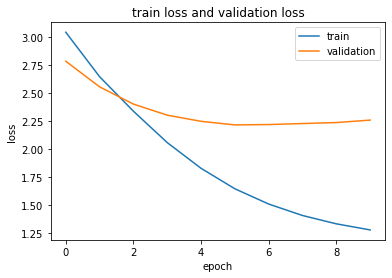

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train loss and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')
plt.show

In [20]:
lyricist.save_weights(os.getenv('HOME')+'/aiffel/enode4/lyricist/checkpoints/new_fifth_checkpoint')
lyricist.save(os.getenv('HOME')+'/aiffel/enode4/lyricist/saved_model/new_fifth_model')

INFO:tensorflow:Assets written to: /aiffel/aiffel/enode4/lyricist/saved_model/new_fifth_model/assets


INFO:tensorflow:Assets written to: /aiffel/aiffel/enode4/lyricist/saved_model/new_fifth_model/assets


### 과적합 해결 시도2
- `Dropout` 한 계층으로는 가시적인 성능 향상이 보이지 않아 한 계층 더 추가했다.

In [21]:
class TextGeneratorWithDrops(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.drop1 = tf.keras.layers.Dropout(0.3)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.drop2 = tf.keras.layers.Dropout(0.3)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.drop1(out)
        out = self.rnn_2(out)
        out = self.drop2(out)
        out = self.linear(out)
        
        return out

In [22]:
embedding_size = 512
hidden_size = 1600
lyricist = TextGeneratorWithDrops(tokenizer.num_words + 1, embedding_size, hidden_size)
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
lyricist.compile(loss=loss, optimizer=optimizer)
history=lyricist.fit(enc_train, dec_train, epochs=10, validation_data=(enc_val,dec_val))

Epoch 1/10
3867/3867 [==============================] - 625s 159ms/step - loss: 3.2758 - val_loss: 2.7320
Epoch 2/10
3867/3867 [==============================] - 619s 160ms/step - loss: 2.6294 - val_loss: 2.4998
Epoch 3/10
3867/3867 [==============================] - 617s 159ms/step - loss: 2.2899 - val_loss: 2.3646
Epoch 4/10
3867/3867 [==============================] - 621s 160ms/step - loss: 2.0287 - val_loss: 2.2811
Epoch 5/10
3867/3867 [==============================] - 615s 159ms/step - loss: 1.8394 - val_loss: 2.2403
Epoch 6/10
3867/3867 [==============================] - 615s 159ms/step - loss: 1.7105 - val_loss: 2.2164
Epoch 7/10
3867/3867 [==============================] - 618s 160ms/step - loss: 1.6102 - val_loss: 2.2058
Epoch 8/10
3867/3867 [==============================] - 617s 159ms/step - loss: 1.5388 - val_loss: 2.2026
Epoch 9/10
3867/3867 [==============================] - 615s 159ms/step - loss: 1.4849 - val_loss: 2.2116
Epoch 10/10
3867/3867 [=======================

<function matplotlib.pyplot.show(close=None, block=None)>

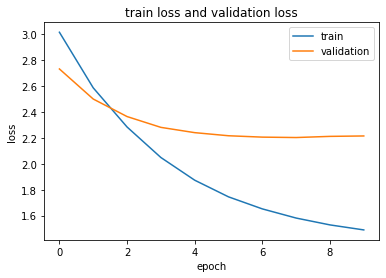

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train loss and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')
plt.show

In [29]:
lyricist.save_weights(os.getenv('HOME')+'/aiffel/enode4/lyricist/checkpoints/drops_checkpoint2')
lyricist.save(os.getenv('HOME')+'/aiffel/enode4/lyricist/saved_model/drops_model2')

INFO:tensorflow:Assets written to: /aiffel/aiffel/enode4/lyricist/saved_model/drops_model2/assets


INFO:tensorflow:Assets written to: /aiffel/aiffel/enode4/lyricist/saved_model/drops_model2/assets


In [ ]:
embedding_size = 512
hidden_size = 1600
lyricist = TextGeneratorWithDrops(tokenizer.num_words + 1, embedding_size, hidden_size)
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
lyricist.compile(loss=loss, optimizer=optimizer)
history=lyricist.fit(enc_train, dec_train, epochs=10, validation_data=(enc_val,dec_val))

Epoch 1/10
3866/3866 [==============================] - 1603s 411ms/step - loss: 3.2002 - val_loss: 2.6929
Epoch 2/10
3866/3866 [==============================] - 1463s 378ms/step - loss: 2.6316 - val_loss: 2.4885
Epoch 3/10
3866/3866 [==============================] - 1510s 391ms/step - loss: 2.3715 - val_loss: 2.3634
Epoch 4/10
3866/3866 [==============================] - 1637s 424ms/step - loss: 2.1734 - val_loss: 2.2829
Epoch 5/10
3866/3866 [==============================] - 1635s 423ms/step - loss: 2.0172 - val_loss: 2.2295
Epoch 6/10
3866/3866 [==============================] - 1649s 427ms/step - loss: 1.8976 - val_loss: 2.1954
Epoch 7/10
3048/3866 [======================>.......] - ETA: 4:58 - loss: 1.7934

- `val_loss` 값이 2.2 이하를 달성했지만!!! 이 모델이 진짜 넘을 줄을 모르고 early stopping을 걸지 않았고.... 다시 callback을 걸기에는 제출 기한이 얼마 남지 않았다.

## 6) 모델 평가
- 모델이 생성해낸 문장이 자연스러운지 확인

In [14]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    # 테스트를 위해서 입력받은 init_sentence도 텐서로 변환합니다
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    #
    #    1. 입력받은 문장의 텐서를 입력합니다
    #    2. 예측된 값 중 가장 높은 확률인 word index를 뽑아냅니다
    #    3. 2에서 예측된 word index를 문장 뒤에 붙입니다
    #    4. 모델이 <end>를 예측했거나, max_len에 도달했다면 문장 생성을 마칩니다
    while True:
        # 1
        predict = model(test_tensor) 
        # 2
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1] 
        # 3 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)
        # 4
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # tokenizer를 이용해 word index를 단어로 하나씩 변환합니다 
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

In [35]:
generate_text(lyricist, tokenizer, init_sentence="<start> i love", max_len=20)

'<start> i love you , i love you <end> '

In [36]:
generate_text(lyricist, tokenizer, init_sentence="<start> i like your", max_len=20)

'<start> i like your extremes <end> '

In [37]:
generate_text(lyricist, tokenizer, init_sentence="<start> im still", max_len=20)

'<start> im still the one that i m in the hood <end> '

In [39]:
generate_text(lyricist, tokenizer, init_sentence="<start> everyday", max_len=20)

'<start> everyday i m gonna be a fool <end> '

In [40]:
generate_text(lyricist, tokenizer, init_sentence="<start> such a", max_len=20)

'<start> such a little selfish <end> '

In [42]:
generate_text(lyricist, tokenizer, init_sentence="<start> when you", max_len=20)

'<start> when you re ready <end> '

In [43]:
generate_text(lyricist, tokenizer, init_sentence="<start> you", max_len=20)

'<start> you re the only one who knows <end> '

In [45]:
generate_text(lyricist, tokenizer, init_sentence="<start> my", max_len=20)

'<start> my name is prince <end> '

In [48]:
generate_text(lyricist, tokenizer, init_sentence="<start> maybe", max_len=20)

'<start> maybe i m not sure <end> '

In [27]:
generate_text(lyricist, tokenizer, init_sentence="<start> how dare", max_len=20)

Epoch 1/10
3867/3867 [==============================] - 350s 89ms/step - loss: 3.3593 - val_loss: 2.8272
Epoch 2/10
3867/3867 [==============================] - 350s 91ms/step - loss: 2.7647 - val_loss: 2.6401
Epoch 3/10
3867/3867 [==============================] - 350s 91ms/step - loss: 2.5178 - val_loss: 2.5163
Epoch 4/10
3867/3867 [==============================] - 350s 91ms/step - loss: 2.3182 - val_loss: 2.4376
Epoch 5/10
3867/3867 [==============================] - 352s 91ms/step - loss: 2.1663 - val_loss: 2.3817
Epoch 6/10
3867/3867 [==============================] - 352s 91ms/step - loss: 2.0392 - val_loss: 2.3472
Epoch 7/10
3867/3867 [==============================] - 350s 90ms/step - loss: 1.9434 - val_loss: 2.3273
Epoch 8/10
3867/3867 [==============================] - 351s 91ms/step - loss: 1.8640 - val_loss: 2.3088
Epoch 9/10
3867/3867 [==============================] - 353s 91ms/step - loss: 1.8027 - val_loss: 2.2990
Epoch 10/10
3867/3867 [==============================] 

- 생성해 내는 문장 자체는 깔끔한 것 같다!

# 회고

- 하이퍼 파라미터 튜닝을 도와주는 오픈소스에 대해서 공부해야겠다.
    - 오픈소스를 활용해서 하이퍼 파라미터 크기가 모델 학습에 미치는 영향을 가시화하는 것이 필요해 보인다.
    - 알아볼 것 : `Optuna`
- 학습에 앞서 데이터를 충분히 탐색하는 시간을 가져야겠다.
- RNN은 모델 개념 자체가 익숙한 편이 아니다보니까 어떤 계층을 넣어서 과적합을 막아야할지 확실하게 감이 안잡혔다. 케라스의 LSTM 레이어에 어떤 식으로 커스터마이징을 할 수 있는지를 알아보고 LSTM 모델에서 과적합을 막기위해 자주 쓰이는 방법론을 정리해야겠다.
    - 알아볼 것 : `Dropout`이 은닉층 사이에 들어갈 경우 효과가 적어지는 이유